In [95]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
import plotly.graph_objects as go

In [2]:
df_sport = pd.read_csv(r'C:\Users\saadais\OneDrive - Hewlett Packard Enterprise\Desktop\Auto_f\Python\UDEMY\5-IPL data Analysis\IPL Ball-by-Ball 2008-2020.csv')
df_matches = pd.read_csv(r'C:\Users\saadais\OneDrive - Hewlett Packard Enterprise\Desktop\Auto_f\Python\UDEMY\5-IPL data Analysis\IPL Matches 2008-2020.csv')


In [3]:
df_matches.head(5)

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan


In [4]:
df_matches.shape

(816, 17)

In [5]:
 df_matches['season']= df_matches['date'].apply(lambda x : x.split('-')[0])

In [6]:
df_season = df_matches.groupby(['season'])['toss_decision'].value_counts().reset_index()
df_season

,season,toss_decision,count
0,2008,field,32
1,2008,bat,26
2,2009,bat,35
3,2009,field,22
4,2010,bat,39
5,2010,field,21
6,2011,field,48
7,2011,bat,25
8,2012,bat,37
9,2012,field,37


<Axes: xlabel='season', ylabel='count'>

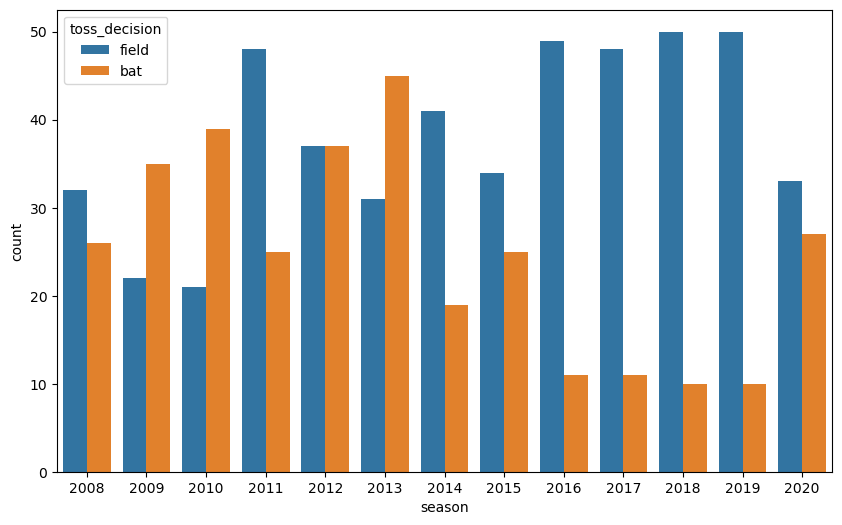

In [7]:
plt.figure(figsize=(10,6))
sns.barplot( x='season', y='count', hue='toss_decision', data=df_season)

## winning toss implies winning games

In [8]:
df_matches[['team1','team2','toss_winner','winner']]

,team1,team2,toss_winner,winner
0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,Kolkata Knight Riders
1,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,Chennai Super Kings
2,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,Delhi Daredevils
3,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,Royal Challengers Bangalore
4,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,Kolkata Knight Riders
...,...,...,...,...
811,Royal Challengers Bangalore,Mumbai Indians,Mumbai Indians,Royal Challengers Bangalore
812,Mumbai Indians,Delhi Capitals,Delhi Capitals,Mumbai Indians
813,Royal Challengers Bangalore,Sunrisers Hyderabad,Sunrisers Hyderabad,Sunrisers Hyderabad
814,Delhi Capitals,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals


In [9]:
df_matches["tos_win_game_win"]=np.where(df_matches['toss_winner']==df_matches['winner'], 'yes', 'no')

In [10]:
df_matches["tos_win_game_win"].value_counts()

tos_win_game_win
yes    418
no     398
Name: count, dtype: int64

In [11]:
df_matches["tos_win_game_win"].value_counts().index

Index(['yes', 'no'], dtype='object', name='tos_win_game_win')

([<matplotlib.patches.Wedge at 0x1dc816de590>,
 [Text(-0.042339411351007016, 1.0991848680938299, 'yes'),
  Text(0.04233941135100639, -1.09918486809383, 'no')],
 [Text(-0.032716817862141784, 0.8493701253452322, '51.2%'),
  Text(0.0327168178621413, -0.8493701253452323, '48.8%')])

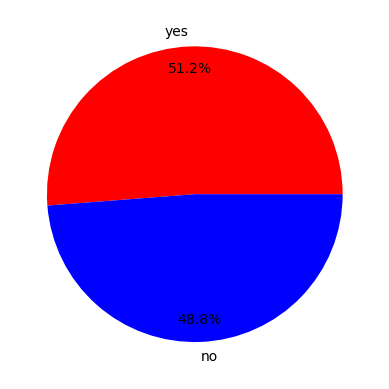

In [12]:
label = df_matches["tos_win_game_win"].value_counts().index
data =df_matches["tos_win_game_win"].value_counts()
colors = ['#FF0000', '#0000FF']

explode = (0.05, 0.05)

plt.pie(data, colors=colors, labels=label,
         autopct='%1.1f%%', pctdistance=0.85)

## winnig toss doesn't mean winning game :) 

## comparative analysis of teams

In [15]:
df_matches.head(5)

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2,season,tos_win_game_win
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen,2008,no
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri,2008,yes
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar,2008,no
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper,2008,no
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan,2008,no


 ### total match played by each team

In [42]:
total_match_played_by_team = df_matches['team1'].value_counts() + df_matches['team2'].value_counts()

In [43]:
df_match_team = total_match_played_by_team.to_frame().reset_index()

In [57]:
df_match_team.columns=['team_name','number_match']

In [58]:
df_match_team

,team_name,number_match
0,Chennai Super Kings,178
1,Deccan Chargers,75
2,Delhi Capitals,33
3,Delhi Daredevils,161
4,Gujarat Lions,30
5,Kings XI Punjab,190
6,Kochi Tuskers Kerala,14
7,Kolkata Knight Riders,192
8,Mumbai Indians,203
9,Pune Warriors,46


### number of match winned by each team

In [77]:
winners = df_matches['winner'].value_counts()

In [80]:
df_winner = winners.to_frame().reset_index()


In [82]:
df_winner.columns=['team_name','winns']

In [85]:
df_winner

,team_name,winns
0,Mumbai Indians,120
1,Chennai Super Kings,106
2,Kolkata Knight Riders,99
3,Royal Challengers Bangalore,91
4,Kings XI Punjab,88
5,Rajasthan Royals,81
6,Delhi Daredevils,67
7,Sunrisers Hyderabad,66
8,Deccan Chargers,29
9,Delhi Capitals,19


###  Merge two table 

In [88]:
df_played=df_match_team.merge(df_winner, on='team_name', how='inner')

In [90]:
df_played

,team_name,number_match,winns
0,Chennai Super Kings,178,106
1,Deccan Chargers,75,29
2,Delhi Capitals,33,19
3,Delhi Daredevils,161,67
4,Gujarat Lions,30,13
5,Kings XI Punjab,190,88
6,Kochi Tuskers Kerala,14,6
7,Kolkata Knight Riders,192,99
8,Mumbai Indians,203,120
9,Pune Warriors,46,12


In [114]:

trace_1 =go.Bar(
x = df_played['team_name'],
y = df_played['number_match'],
    
name='total matches'
    
)

trace_2 =go.Bar(
x = df_played['team_name'],
y = df_played['winns'],
    
name='matches won'
    
)


data = [trace_1,trace_2]

In [127]:
!pip install chart_studio

import chart_studio.plotly as py
import plotly.offline as py

In [128]:
py.plot(data)

'temp-plot.html'